# Brain Stroke Prediction

### Importing libraries

In [84]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [85]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

### About data

In [86]:
data=pd.read_csv("full_data.csv")
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


### Basic info

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [88]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [89]:
data.shape

(4981, 11)

In [90]:
data.ndim

2

In [91]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [92]:
data["stroke"].unique()

array([1, 0], dtype=int64)

In [93]:
data["gender"].unique()

array(['Male', 'Female'], dtype=object)

In [94]:
data.stroke.value_counts().rename("count"),
data.stroke.value_counts(True).rename("%").mul(100)

stroke
0    95.02108
1     4.97892
Name: %, dtype: float64

In [95]:
data["stroke"].value_counts()

stroke
0    4733
1     248
Name: count, dtype: int64

In [96]:
data["stroke"].sample(20)

2787    0
279     0
1313    0
1473    0
4418    0
2677    0
3837    0
819     0
600     0
2599    0
2467    0
4145    0
1862    0
1369    0
571     0
1851    0
2939    0
411     0
3715    0
4292    0
Name: stroke, dtype: int64

In [97]:
data.isnull()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4976,False,False,False,False,False,False,False,False,False,False,False
4977,False,False,False,False,False,False,False,False,False,False,False
4978,False,False,False,False,False,False,False,False,False,False,False
4979,False,False,False,False,False,False,False,False,False,False,False


In [98]:
data.isnull().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [100]:
# dup
data.gender.duplicated().sum()

4979

In [101]:
data.duplicated().sum()

0

### Checking for null values

In [102]:
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Checking unique values

In [103]:
print("Number Of Unique Values:\n")
print(data.nunique())

Number Of Unique Values:

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64


In [104]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

#### Visualisation of Stroke_status

<Axes: title={'center': 'stroke'}, xlabel='stroke'>

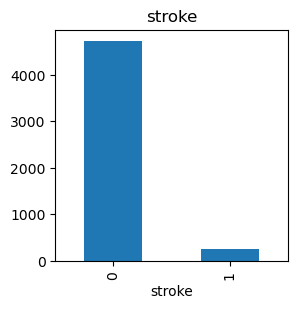

In [105]:
plt.figure(figsize=(3,3))
data["stroke"].value_counts().plot.bar(title='stroke')

### Converting String Values

In [106]:
from sklearn.preprocessing import LabelEncoder

In [107]:
le=LabelEncoder()
data["gender"]=le.fit_transform(data["gender"])
data["ever_married"]=le.fit_transform(data["ever_married"])
data["work_type"]=le.fit_transform(data["work_type"])
data["Residence_type"]=le.fit_transform(data["Residence_type"])
data["smoking_status"]=le.fit_transform(data["smoking_status"])

In [108]:
data.dtypes

gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object

In [109]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,3,0


### Heat map of dataset

In [110]:
import seaborn as sns

In [111]:
correlation=data.corr()
correlation

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.026538,0.021485,0.086476,-0.028971,0.065784,-0.004301,0.055796,-0.012093,-0.062666,0.008870
age,-0.026538,1.000000,0.278120,0.264852,0.677137,-0.415935,0.017155,0.236763,0.373703,0.265623,0.246478
hypertension,0.021485,0.278120,1.000000,0.111974,0.164534,-0.061618,-0.004755,0.170028,0.158762,0.110045,0.131965
heart_disease,0.086476,0.264852,0.111974,1.000000,0.114765,-0.036943,0.002125,0.166847,0.060926,0.048093,0.134610
ever_married,-0.028971,0.677137,0.164534,0.114765,1.000000,-0.406439,0.008191,0.150724,0.371690,0.262384,0.108398
work_type,0.065784,-0.415935,-0.061618,-0.036943,-0.406439,1.000000,-0.003524,-0.059658,-0.382418,-0.356738,-0.041835
Residence_type,-0.004301,0.017155,-0.004755,0.002125,0.008191,-0.003524,1.000000,0.001346,0.013185,0.010209,0.016494
avg_glucose_level,0.055796,0.236763,0.170028,0.166847,0.150724,-0.059658,0.001346,1.000000,0.186348,0.064089,0.133227
bmi,-0.012093,0.373703,0.158762,0.060926,0.371690,-0.382418,0.013185,0.186348,1.000000,0.243111,0.056926
smoking_status,-0.062666,0.265623,0.110045,0.048093,0.262384,-0.356738,0.010209,0.064089,0.243111,1.000000,0.027463


In [112]:
# corr=data.corr()
# plt.figure(figsize=(10,10))
# sns.heatmap(data=corr,annot=True, cmap="Greens").set(title="correlation matrix")

In [113]:
# fig=plt.figure(figsize=(15,15))
# sns.heatmap(data.corr(),annot=True)

In [114]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,3,0


In [115]:
x=data.drop(["stroke"], axis=1)
y=data.stroke
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,1,1,228.69,36.6,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2
2,0,49.0,0,0,1,1,1,171.23,34.4,3
3,0,79.0,1,0,1,2,0,174.12,24.0,2
4,1,81.0,0,0,1,1,1,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1
4977,1,40.0,0,0,1,1,1,191.15,31.1,3
4978,0,45.0,1,0,1,0,0,95.02,31.8,3
4979,1,40.0,0,0,1,1,0,83.94,30.0,3


In [116]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4976    0
4977    0
4978    0
4979    0
4980    0
Name: stroke, Length: 4981, dtype: int64

In [117]:
y.value_counts()

stroke
0    4733
1     248
Name: count, dtype: int64

<Axes: ylabel='count'>

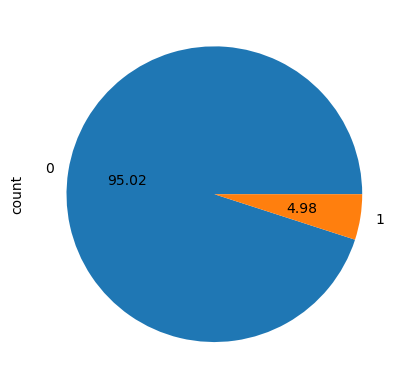

In [118]:
y.value_counts().plot.pie(autopct='%.2f')

In [119]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(sampling_strategy=1)
x_res,y_res=rus.fit_resample(x,y)

<Axes: ylabel='count'>

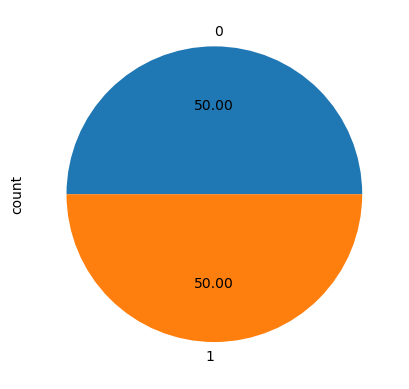

In [120]:
y_res.value_counts().plot.pie(autopct='%.2f')

In [121]:
y_res.value_counts()

stroke
0    248
1    248
Name: count, dtype: int64

### Importing train test split

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.3, random_state=12)

In [124]:
model=RandomForestClassifier(n_estimators=100, random_state=35)

In [125]:
model.fit(x_train,y_train)

RandomForestClassifier(random_state=35)

In [126]:
model.score(x_train,y_train)

1.0

In [127]:
model.score(x_test,y_test)

0.9464882943143813

In [128]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

1.0
0.9464882943143813


In [129]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [130]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1415,    2],
       [  78,    0]], dtype=int64)

In [131]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1417
           1       0.00      0.00      0.00        78

    accuracy                           0.95      1495
   macro avg       0.47      0.50      0.49      1495
weighted avg       0.90      0.95      0.92      1495



### Finding the best model, score and parameter

In [132]:
model_params={"svm":{"model":SVC(gamma="auto"),"params":{"C":[1,5,10],"kernel":["rbf","Linear"]}},
             "random_forest":{"model":RandomForestClassifier(),"params":{"n_estimators":[1,5,10]}},
             "LogisticRegression":{"model":LogisticRegression(),"params":{"C":[1,5,10]}}}

In [133]:
score = []
models = ["svm","random_forest","LogisticRegression"]

In [134]:
for model_name in models:
    mp = model_params[model_name]
    gds = GridSearchCV(mp["model"],mp["params"],cv=5,return_train_score=True)
    gds.fit(x_train,y_train)
    score.append({"model": model_name, "best_score": gds.best_score_, "best_params": gds.best_params_})

In [135]:
score

[{'model': 'svm',
  'best_score': 0.950946545366347,
  'best_params': {'C': 1, 'kernel': 'rbf'}},
 {'model': 'random_forest',
  'best_score': 0.9492261143747456,
  'best_params': {'n_estimators': 10}},
 {'model': 'LogisticRegression',
  'best_score': 0.9512334894122582,
  'best_params': {'C': 1}}]

In [136]:
best_score=gds.best_score_
best_score

0.9512334894122582

In [137]:
best_parameter=gds.best_params_
best_parameter

{'C': 1}

In [138]:
pd.DataFrame(score)

,model,best_score,best_params
0,svm,0.950947,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.949226,{'n_estimators': 10}
2,LogisticRegression,0.951233,{'C': 1}


In [156]:
y_pred=model.predict([[1,60.0,1,1,1,1,1,289.27,49.8,3]])
y_pred

array([1], dtype=int64)

In [157]:
y_pred=model.predict([[0,21.0,0,0,0,1,1,89.27,21.8,0]])
y_pred

array([0], dtype=int64)

In [158]:
# y_pred=model.predict([[0,50.0,1,1,1,1,1,189.27,49.8,3]])
# y_pred

In [159]:
# *Average glucose level for a human being is between 70 mg/dL (3.9 mmol/L) and 100 mg/dL (5.6 mmol/L).
# *If your BMI is less than 18.5, it falls within the underweight range. If your BMI is 18.5 to 24.9, it falls within the Healthy Weight range. If your BMI is 25.0 to 29.9, it falls within the overweight range.

In [160]:
user_input = {
    'gender':int(input('Enter your Gender (1 for male, 0 for female): ')),
    'age':float(input('Enter Age: ')),
    'hypertension':int(input('Do you feel Hypertension (0 for no, 1 for yes): ')),
    'heart_disease':int(input('Do you have Heart disease (0 for no, 1 for yes): ')),
    'ever_married':int(input('Are you married (0 for no, 1 for yes):')),
    'work_type': int(input('Enter your work type (0 for govt_job,1 for private job,2 for self_employ,3 for children): ')),
    'Residence_type': int(input('Enter residence area (0 for rural,1 for urban): ')),
    'avg_glucose_level': float(input('Enter your glucose level: ')),
    'bmi': float(input('Enter your BMI: ')),
    'smoking_status': int(input('Do you smoke (0 for unknown,1 for formely smoked,2 for never smoked,3 for smokes) ')),
}

Enter your Gender (1 for male, 0 for female): 0
Enter Age: 21.0
Do you feel Hypertension (0 for no, 1 for yes): 0
Do you have Heart disease (0 for no, 1 for yes): 0
Are you married (0 for no, 1 for yes):0
Enter your work type (0 for govt_job,1 for private job,2 for self_employ,3 for children): 0
Enter residence area (0 for rural,1 for urban): 1
Enter your glucose level: 89.27
Enter your BMI: 49.8
Do you smoke (0 for unknown,1 for formely smoked,2 for never smoked,3 for smokes) 3


In [161]:
user=pd.DataFrame([user_input])
user

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,21.0,0,0,0,0,1,89.27,49.8,3


In [162]:
model.predict(user)

array([0], dtype=int64)